# 0. Import modules

In [2]:
# I'm using google collab for this challange
# this is to link my drive where i host the files

from google.colab import drive 
drive.mount('/content/gdrive')


%cd /content/gdrive/My\ Drive/CHALLENGE
!pwd

Mounted at /content/gdrive
/content/gdrive/My Drive/CHALLENGE
/content/gdrive/My Drive/CHALLENGE


In [86]:
# Execute if you dont have the modules

#!pip install python-bidi
#!pip install arabic_reshaper

#!pip install transformers
#!git clone https://github.com/aub-mind/arabert
#!pip install pyarabic
#!pip install farasapy
#!pip install transformers


In [88]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# suppress matplotlib debugging (when printing reshaped arabic)
import logging
logging.getLogger('matplotlib.font_manager').disabled = True



from sklearn.model_selection import train_test_split
import tensorflow as tf



# for inversing arabic so it displays properly when plotting
from bidi.algorithm import get_display
import arabic_reshaper as reshaper



# BERT, word processors and tokenizers
from transformers import BertTokenizer
from arabert.preprocess_arabert import never_split_tokens, preprocess
from farasa.segmenter import FarasaSegmenter
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

import sys

[2020-09-21 17:08:39,253 - DEBUG]: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


 Dependcies info

In [89]:
# Dependencies info of main modules (Do not re-execute otherwise will be override)
print(f"Versions:\nPython: {sys.version.split(' ')[0]}\nPandas: {pd.__version__}\nTensorflow: {tf.__version__}\nNumpy: {np.__version__}")

Versions:
Python: 3.6.9
Pandas: 1.0.5
Tensorflow: 2.3.0
Numpy: 1.18.5


In [5]:
# Farasa segmenter to preprocess sentences later
farasa_segmenter = FarasaSegmenter(interactive=False)

# instantiating the bert tokenizer
# this will be used to convert words to IDs and special characters
arabert_tokenizer = BertTokenizer.from_pretrained(
    "aubmindlab/bert-base-arabert",
    do_lower_case=True,
    do_basic_tokenize=True,
    never_split=never_split_tokens)

[2020-09-21 15:53:27,551 - DEBUG]: perform system check...
[2020-09-21 15:53:27,553 - DEBUG]: check java version...
[2020-09-21 15:53:28,172 - DEBUG]: Your java version is 11.0 which is compatiple with Farasa 
[2020-09-21 15:53:28,174 - DEBUG]: check toolkit binaries...
[2020-09-21 15:53:28,175 - INFO]: some binaries are not existed.
[2020-09-21 15:53:28,180 - INFO]: downloading zipped binaries...
[2020-09-21 15:53:28,193 - DEBUG]: Starting new HTTPS connection (1): farasa-api.qcri.org:443
[2020-09-21 15:53:28,755 - DEBUG]: https://farasa-api.qcri.org:443 "GET /farasapy/releases/download/toolkit-bins-released/farasa_bin.zip HTTP/1.1" 200 200394706


100%|██████████| 200M/200M [00:07<00:00, 25.8MiB/s]

[2020-09-21 15:53:36,518 - DEBUG]: extracting...


[2020-09-21 15:53:37,432 - DEBUG]: toolkit binaries are downloaded and extracted.
[2020-09-21 15:53:37,434 - INFO]: Dependencies seem to be satisfied..
[2020-09-21 15:53:37,435 - INFO]: task [SEGMENT] is initialized in STANDALONE mode...
[2020-09-21 15:53:37,766 - DEBUG]: Starting new HTTPS connection (1): s3.amazonaws.com:443
[2020-09-21 15:53:37,843 - DEBUG]: https://s3.amazonaws.com:443 "HEAD /models.huggingface.co/bert/aubmindlab/bert-base-arabert/vocab.txt HTTP/1.1" 200 0
[2020-09-21 15:53:37,849 - DEBUG]: Attempting to acquire lock 140448316767144 on /root/.cache/torch/transformers/e00d70bd70387a7cefb7b3f960c2b4bff22c254c680dabca3c09336b98c42396.a17ce51bb78b7fa46a5b28baee670bca2f9bf6bc93608fc37438db58382e5bc0.lock
[2020-09-21 15:53:37,850 - INFO]: Lock 140448316767144 acquired on /root/.cache/torch/transformers/e00d70bd70387a7cefb7b3f960c2b4bff22c254c680dabca3c09336b98c42396.a17ce51bb78b7fa46a5b28baee670bca2f9bf6bc93608fc37438db58382e5bc0.lock
[2020-09-21 15:53:37,857 - DEBUG]: S

[2020-09-21 15:53:38,100 - DEBUG]: Attempting to release lock 140448316767144 on /root/.cache/torch/transformers/e00d70bd70387a7cefb7b3f960c2b4bff22c254c680dabca3c09336b98c42396.a17ce51bb78b7fa46a5b28baee670bca2f9bf6bc93608fc37438db58382e5bc0.lock
[2020-09-21 15:53:38,102 - INFO]: Lock 140448316767144 released on /root/.cache/torch/transformers/e00d70bd70387a7cefb7b3f960c2b4bff22c254c680dabca3c09336b98c42396.a17ce51bb78b7fa46a5b28baee670bca2f9bf6bc93608fc37438db58382e5bc0.lock
[2020-09-21 15:53:38,106 - DEBUG]: Starting new HTTPS connection (1): s3.amazonaws.com:443
[2020-09-21 15:53:38,178 - DEBUG]: https://s3.amazonaws.com:443 "HEAD /models.huggingface.co/bert/aubmindlab/bert-base-arabert/added_tokens.json HTTP/1.1" 404 0
[2020-09-21 15:53:38,185 - DEBUG]: Starting new HTTPS connection (1): s3.amazonaws.com:443
[2020-09-21 15:53:38,264 - DEBUG]: https://s3.amazonaws.com:443 "HEAD /models.huggingface.co/bert/aubmindlab/bert-base-arabert/special_tokens_map.json HTTP/1.1" 200 0
[2020-09

[2020-09-21 15:53:38,364 - DEBUG]: https://s3.amazonaws.com:443 "GET /models.huggingface.co/bert/aubmindlab/bert-base-arabert/special_tokens_map.json HTTP/1.1" 200 112


[2020-09-21 15:53:38,400 - DEBUG]: Attempting to release lock 140448316767144 on /root/.cache/torch/transformers/4b95797216e163eea8d9cb1922733c29b4b3ba1036fc48b291cfe660b4240c51.275045728fbf41c11d3dae08b8742c054377e18d92cc7b72b6351152a99b64e4.lock
[2020-09-21 15:53:38,401 - INFO]: Lock 140448316767144 released on /root/.cache/torch/transformers/4b95797216e163eea8d9cb1922733c29b4b3ba1036fc48b291cfe660b4240c51.275045728fbf41c11d3dae08b8742c054377e18d92cc7b72b6351152a99b64e4.lock
[2020-09-21 15:53:38,407 - DEBUG]: Starting new HTTPS connection (1): s3.amazonaws.com:443
[2020-09-21 15:53:38,493 - DEBUG]: https://s3.amazonaws.com:443 "HEAD /models.huggingface.co/bert/aubmindlab/bert-base-arabert/tokenizer_config.json HTTP/1.1" 200 0
[2020-09-21 15:53:38,498 - DEBUG]: Attempting to acquire lock 140448314280200 on /root/.cache/torch/transformers/7f3845bf9305a0617f5c8bed56fae2122d82c8f1e2fb5daea826606bcff59b32.1ddbe932d1da5efd2703149c0507e2f0c6ef863b1470aecbc2275f5edf984bea.lock
[2020-09-21 15

[2020-09-21 15:53:38,605 - DEBUG]: https://s3.amazonaws.com:443 "GET /models.huggingface.co/bert/aubmindlab/bert-base-arabert/tokenizer_config.json HTTP/1.1" 200 406


[2020-09-21 15:53:38,645 - DEBUG]: Attempting to release lock 140448314280200 on /root/.cache/torch/transformers/7f3845bf9305a0617f5c8bed56fae2122d82c8f1e2fb5daea826606bcff59b32.1ddbe932d1da5efd2703149c0507e2f0c6ef863b1470aecbc2275f5edf984bea.lock
[2020-09-21 15:53:38,647 - INFO]: Lock 140448314280200 released on /root/.cache/torch/transformers/7f3845bf9305a0617f5c8bed56fae2122d82c8f1e2fb5daea826606bcff59b32.1ddbe932d1da5efd2703149c0507e2f0c6ef863b1470aecbc2275f5edf984bea.lock
[2020-09-21 15:53:38,655 - DEBUG]: Starting new HTTPS connection (1): s3.amazonaws.com:443
[2020-09-21 15:53:38,766 - DEBUG]: https://s3.amazonaws.com:443 "HEAD /models.huggingface.co/bert/aubmindlab/bert-base-arabert/tokenizer.json HTTP/1.1" 404 0


# 1. Import the dataset

In [83]:
# reading full dataset
poems = pd.read_csv("Arabic Poetry Dataset/all_poems_58K.csv")

In [84]:
# checking out datatypes
poems.dtypes

poem_id        int64
poem_link     object
poem_style    object
poem_text     object
poem_title    object
poet_cat      object
poet_id        int64
poet_link     object
poet_name     object
dtype: object

In [85]:
# checking how the DataFrame looks like
poems.head(3)

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
0,21,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,أنشودة المطر,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
1,65546,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,انا لا ازال و في يدي قدحي ياليل اين تفرق الشر...,أقداح و أحلام,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
2,65561,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة ...,هوى واحد !,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب


# 2. Explore the data and visualize significant variables (EDA).

### Poem style and Poem origin
Below i will check the distribution of two features, poem style and poem origin. The rest are too dense to visualize (contain many values)


In [59]:
def show_unique(df, cols):
  '''
  A function to visualize unique categories within each column with their distribution
  param df: (DataFrame) dataframe containing the data
  param cols: (list) list of names of categorical columns
  '''
  # size of the figure
  n_cols = len(cols) 

  # creating the main figure
  fig = plt.figure(figsize=(10*n_cols, 10*n_cols))

  # for each column, make a pie chart
  for idx, col in enumerate(cols):
    # creating a subplot
    ax = fig.add_subplot(n_cols, n_cols,idx+1)

    # Counting each category and plotting 
    grouped = df.groupby(col)[col].count().sort_values()

    # Big fuss here to inverse arabic so it is readable
    ax.barh(y=[get_display(reshaper.reshape(cat)) for cat in grouped.index],
            width=grouped.values)
    ax.set_title(f'{col} categories distribution')
    
  plt.show()

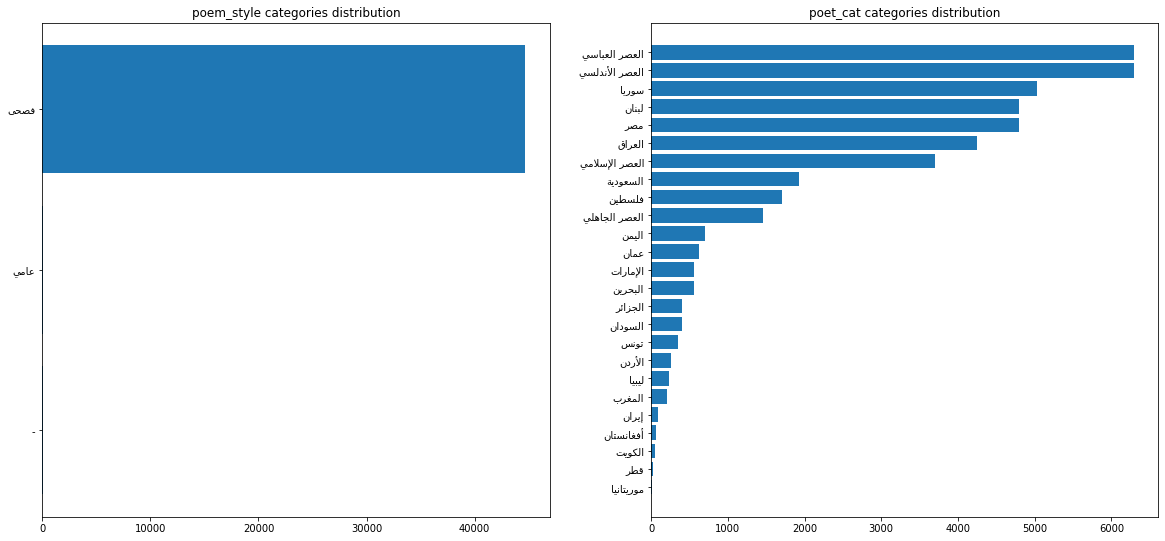

In [60]:
# using the function above to plot distribtion of categories in the features
show_unique(poems, ['poem_style','poet_cat'])

In [11]:
# Just to prove that the marginal poem styles are not empty
# because they cannot be seen in the subplot
poems.groupby('poem_style')['poem_style'].count()

poem_style
-          33
عامي       94
فصحى    57894
Name: poem_style, dtype: int64

According to the left subplot above, most poems are written in formal arabic (فصحى) while the non-formal and unclassified poems are marginal.

Based on the subplot on the right, there are a lot of poets in this dataset which origenated from abasi period. 

Ultimately, we strive for a balanced dataset, usually by applying techniques such as Synthetic Minority Oversampling Technique(SMOTE) to upsample the minority classes or downsampling the majority classes. However, when dealing with text, SMOTE does not work as expected as two words could be close to each other in value but drastically differ in meaning. 

On of the way to upsample text is to use word embedding to generate similar words for the entire sequence (text), since each word is represented in the embedding using a vector where related words (in meaning) have relatively high values within the vector. However, for the sake of simplicity, inbalance here is going to be handled by downsampling abasi period poems to almost match the other majority groups, then each origin (group) will be weighted in which, will be used by the model during training to compensate minor groups.


Origin category called  iraq and shaam should be removed as it overlaps with two other origins (iraq, syria).

### number of poems by writer
Below i will visualize how many poems each writer have written, to determine if the poet Name will help determine origin (because it will not work if each poet written small amount of poems).



Then i will visualize the number of unique poets in each origin and whether there exist a poet who had written peoms which differ in origins.

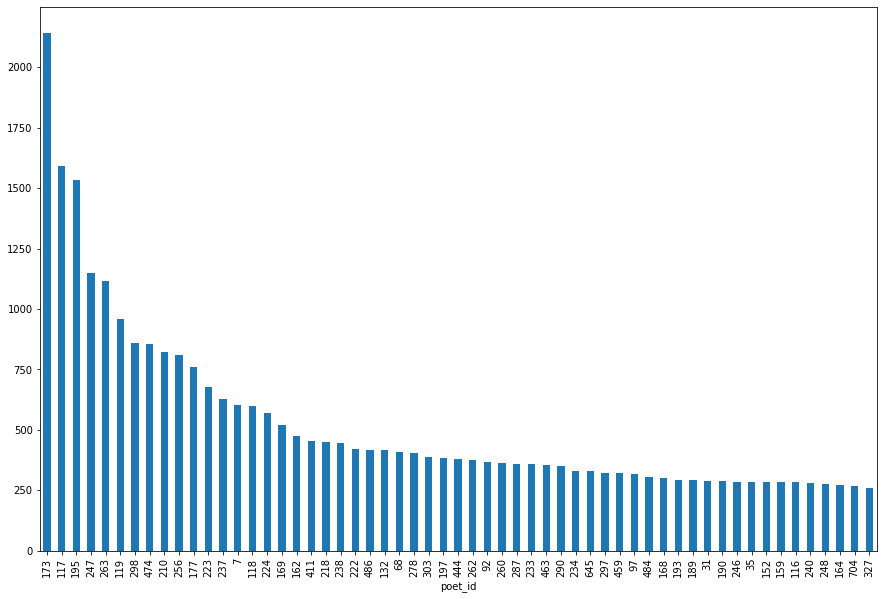

In [12]:
# Counting the number of poems each poet have written
poet_groups = poems.groupby('poet_id')['poem_text'].count().sort_values(ascending=False)

# since there are a lot of poets, will only include those who have written above 250 poems
poet_groups[poet_groups > 250].plot(kind='bar', figsize=(15,10))

Based on above, there are poets who have written many poems. Lets inspect some of poems of the poet with the ID 173

In [13]:
# maximizes column width to see the entire poem
pd.set_option('display.max_colwidth', None)

# check the first two poems for poet with ID 173
poems[poems['poet_id']==173][['poet_name','poem_style','poet_cat','poem_text']].head(2)

,poet_name,poem_style,poet_cat,poem_text
13047,ابن الرومي,فصحى,العصر العباسي,ضحك الربيع الي بكي الديم وغدا يسوي النبت بالقم من بين اخضر لابس كما خضرا وازهر غير ذي كم متلاحق الاطراف متسق فكانه قد طم بالجلم متبلج الضحوات مشرقها متارج الاسحار والعتم تجد الوحوش به كفايتها والطير فيه عتيدة الطعم فظباءه تضحي بمنتطح وحمامه تضحي بمختصم والروض في قطع الزبرجد وال ياقوت تحت لاليء تءم طل يرقرقه علي ورق هاتيك او خيلان غالية واري البليغ قصور مبلغه فغدا يهز اثاءث الجم والدولة الزهراء والزمن ال هار حسبك شافي قرم ان الربيع لكالشباب وان صيف يكسعه لكالهرم اشقاءق النعمان بين ربي نعمان انت محاسن النعم غدت الشقاءق وهي واصفة الاء ذي الجبروت والعظم ترف لابصار كحلن بها ليرين كيف عجاءب الحكم شعل تزيدك في النهار سني وتضيء في محلولك الظلم اعجب بها شعلا علي فحم لم تشتعل في ذلك الفحم وكانما لمع السواد الي ما احمر منها في ضحي الرهم حدق العواشق وسطت مقلا نهلت وعلت من دموع دم يا لشقاءق انها قسم تزهي بها الابصار في القسم ما كان يهدي مثلها تحفا الا تطول بارء النسم
13048,ابن الرومي,فصحى,العصر العباسي,متهل زجل تحن رواعد في حجزتيه وتستطير بروق سدت اواءله سبيل اواخر لم يدر ساءقهن كيف يسوق فسجا واسعد حالبيه بدرة منه سواعد ثرة وعروق وتنفست فيه الصبا فتبجست منه الكلي فاديمه معقوق حتي اذا قضيت لقيعان الملا عنه حقوق بعدهن حقوق طفقت رواياه تجر مزادها فوق الربي ومزادها مشقوق وتضاحك الروض الكءيب لصوبه حتي تفتق نوره المرتوق وتنسمت نفحاته فكانه مسك تضوع فاره مفتوق وتغرد المكاء فيه كانه طرب تعل بالغناء مشوق


### Next i will compare some samples of non-formal poems and formal poems

In [14]:
# getting a sample poem per style
poems.groupby('poem_style')[['poem_style','poem_text']].head(1)

,poem_style,poem_text
0,فصحى,"عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي عنهما القمر عيناك حين تبسمان تورق الكروم وترقص الاضواء كالاقمار في نهر يرجه المجذاف وهنا ساعة السحر كانما تنبض في غوريهما النجوم وتغرقان في ضباب من اسي شفيف كالبحر سرح اليدين فوقه المساء دفء الشتاء فيه وارتعاشة الخريف والموت والميلاد والظلام والضياء فتستفيق ملء روحي رعشة البكاء ونشوة وحشية تعانق السماء كنشوة الطفل اذا خاف من القمر كان اقواس السحاب تشرب الغيوم وقطرة فقطرة تذوب في المطر وكركر الاطفال في عراءش الكروم ودغدغت صمت العصافير علي الشجر انشودة المطر مطر مطر مطر تثاءب المساء والغيوم ما تزال تسح ما تسح من دموعها الثقال كان طفلا بات يهذي قبل ان ينام بان امه – التي افاق منذ عام فلم يجدها ثم حين لج في السءال قالوا له ""بعد غد تعود "" لا بد ان تعود وان تهامس الرفاق انها هناك في جانب التل تنام نومة الحود تسف من ترابها وتشرب المطر كان صيادا حزينا يجمع الشباك ويلعن المياه والقدر وينثر الغناء حيث يافل القمر مطر مطر اتعلمين اي حزن يبعث المطر وكيف تنشج المزاريب اذا انهمر وكيف يشعر الوحيد فيه بالضياع بلا انتهاء – كالدم المراق كالجياع كالحب كالاطفال كالموتي – هو المطر ومقلتاك بي تطيفان مع المطر وعبر امواج الخليج تمسح البروق سواحل العراق بالنجوم والمحار كانها تهم بالشروق فيسحب اليل عليها من دم دثار اصيح بالخليج "" يا خليج يا واهب الءلء والمحار والردي "" فيرجع الصدي كانه النشيج "" يا خليج يا واهب المحار والردي "" اكاد اسمع العراق يذخر الرعود ويخزن البروق في السهول والجبال حتي اذا ما فض عنها ختمها الرجال لم ترك الرياح من ثمود في الواد من اثر اكاد اسمع النخيل يشرب المطر واسمع القري تءن والمهاجرين يصارعون بالمجاذيف وبالقلوع عواصف الخليج والرعود منشدين "" مطر مطر مطر وفي العراق جوع وينثر الغلال فيه موسم الحصاد لتشبع الغربان والجراد وتطحن الشوان والحجر رحي تدور في الحقول حولها بشر مطر مطر مطر وكم ذرفنا ليلة الرحيل من دموع ثم اعتلنا – خوف ان نلام – بالمطر مطر مطر ومنذ ان كنا صغارا كانت السماء تغيم في الشتاء ويهطل المطر وكل عام – حين يعشب الثري – نجوع ما مر عام والعراق ليس فيه جوع مطر مطر مطر في كل قطرة من المطر حمراء او صفراء من اجنة الزهر وكل دمعة من الجياع والعراة وكل قطرة تراق من دم العبيد فهي ابتسام في انتظار مبسم جديد او حلمة توردت علي فم الوليد في عالم الغد الفتي واهب الحياة مطر مطر مطر سيعشب العراق بالمطر "" اصيح بالخليج "" يا خليج يا واهب الءلء والمحار والردي "" فيرجع الصدي كانه النشيج "" يا خليج يا واهب المحار والردي "" وينثر الخليج من هباته الكثار علي الرمال رغوه الاجاج والمحار وما تبقي من عظام باءس غريق من المهاجرين ظل يشرب الردي من لجة الخليج والقرار وفي العراق الف افعي تشرب الرحيق من زهرة يربها الفرات بالندي واسمع الصدي يرن في الخليج "" مطر مطر مطر في كل قطرة من المطر حمراء او صفراء من اجنة الزهر وكل دمعة من الجياع والعراة وكل قطرة تراق من دم العبيد فهي ابتسام في انتظار مبسم جديد او حلمة توردت علي فم الوليد في عالم الغد الفتي واهب الحياة "" ويهطل المطر"
1177,-,هم اكسبوك من السباق رهانا فربحت انت وادركوا الخسرانا هم اوصلوك الي مناك بغدرهم فاذقتهم فوق الهوان هوانا اني لارجو ان تكون بنارهم لما رموك بها بلغت جنانا غدروا بشيبتك الكريمة جهرة ابشر فقد اورثتهم خذلانا اهل الاساءة هم ولكن مادروا كم قدموا لشموخك الاحسانا لقب الشهادة مطمح لم تدخر وسعا لتحمله فكنت وكانا يا احمد الياسين كنت مفوها بالصمت كانا الصمت منك بيانا ما كنت لاهمة وعزيمة وشموخ صبر اعجز العدوانا فرحي بنيل مناك يمزج دمعتي بشارتي ويخف الاحزانا وثقت باله اتصالك حينما صليت فجرك تطلب الغفرانا وتلوت ايات الكتاب مرتلا متاملا تدبر القرانا وضعت جبهتك الكريمة ساجدا ان السجود ليرفع الانسانا وخرجت يتبعك الاحبة مادروا ان الفراق من الاحبة حانا كرسيك المتحرك اختصر المدي وطوي بك الافاق ولازمانا علمته معني الاباء فلم يكن مثل الكراسي الراجفات هوانا معك استلذ الموت صار وفاءه مثلا وصار اباءه عنوانا اشلا ء كرسي البطولة شاهد عدل يدين الغادر الخوانا لكاني ابصرت في عجلاته الما لفقدك لوعة وحنانا حزنا الانك قد رحلت ولم تعد تمشي به كالطواد لا تواني اني لتسالني العدالة بعدما لقيت جحود القوم والنكرانا هل ابصرت اجفان امريكا الظي ام انها لاتملك الاجفانا وعيون اوربا تراها لم تزل في غفلة لا تبصر الطغيانا هل ابصروا جسدا علي كرسيه لما تناثر في الصباح عيانا اين الحضارة ايها الغرب الذي جعل الحضارة جمرة ودخانا عذرا فما هذا سءال تعطف قد ضل من يستعطف البركانا هذا سءال لايجيد جوابه من يعبد الاهواء والشيطانا يا احمد الياسين ان ودعتنا فل

Formal arabic seems to contain less mistypes ('باءس') than unclassified and formal arabic. Furthermore, there are words that are not present in formal arabic dictionary such as "العربان" and much more. Hence, it is best to preprocess the text to separate the prefix and suffix so some of non formal and unclassified texts match formal arabic.

For example:

 العرب will be processed to ال عرب (Formal)

 العربان will be processed to ال عرب ان
 
 This will increase the cances of matches between formal and non-formal texts of similar word origin.

 Below i will use [Farasa toolkit](http://qatsdemo.cloudapp.net/farasa/) to preprocess the two words above to confirm it works as expected.


In [15]:
print(preprocess('العرب', do_farasa_tokenization = True, farasa = farasa_segmenter,
           use_farasapy = True),
preprocess('العربان', do_farasa_tokenization = True, farasa = farasa_segmenter,
           use_farasapy = True),sep='\n')

ال+ عرب
ال+ عرب +ان


Based on the above analysis, poem style feature does not play a crucial role in determining the origin of the poem as most of the poems are written in formal arabic. Furthermore, the difference of words which have the same root will not have a negative effect, as it will be handled during processing which helps in normalizing the varience of words with the same root.

### Number of poets for each origin
Lets check the unique number of poets for each origin

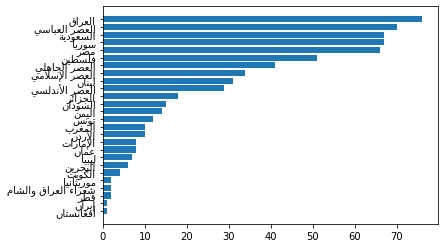

In [16]:
# grouping by origin then counting unique names
poet_group = poems.groupby('poet_cat')['poet_name'].nunique().sort_values()

# plotting 
plt.barh(y=[get_display(reshaper.reshape(origin)) for origin in poet_group.index],
           width=poet_group.values)
plt.show()


Apparently, Iraq has the most poets, followed by abbasi period then saudi, syria and egypt

Now lets see if there is a poet who have written poems of multiple origins

In [17]:
poet_origins = poems.groupby('poet_id')['poet_cat'].nunique()
poet_origins[poet_origins > 1]

Series([], Name: poet_cat, dtype: int64)

The above confirms that there is no writer with multiple origins. This makes the poet an important feature to help with poem origin classification. However, if we use the ID, there could be an issue with infrencing new poems as the poet ID could not be applicable (or coming from a platform with mismatching ID ordering) which will cause the model to spit out inaccurate predictions as the new ID does not match the statistical features of the ID used for training.


To show the correlation of name with oregin, i will group all the names per origin (after segmenting), then compute the term frequency and IDF for each name to visualize how some family name helps in detecting the origin.


### Visualizing poet name relation with origin

Although all origins produce arabic poems, there must exist specific phrases and dialect which distinguish them appart. This is due to many factors such as culture which plays a role in forming these dialects and phrases within an origin [Reference](https://study.com/academy/lesson/how-language-reflects-culture-affects-meaning.html). Furthermore, the title of the poem is supposed to provide a wholistic summary of the poem which captures its characteristics in few words.

Therefore, a model which understands semantic of the title would perform better as it will be able to understand the hidden relations between words in the sentence, which i believe, will improve performance.


However, before we start on the model, lets use TFIDF (which is the term frequency of each term within an origin, multiplied by the total number of origins over the number of origins which uses the term), to visualize the correlation between some family name and poet origins. This is to determine if name of poets could assist us in our classification problem.


#### Making a TF-IDF reference dataframe for poet name
The idea is to have a look up dataframe to determine origin of poet based on poet name.





First step is to group all the names within each origin separately, the names of one origin will be grouped together separated by space, repeated names are allowerd if the poet have written more than one poem.

furthermore, the names will go thru Farasa segmenter which de-attaches the prefix and suffix from the word (not removing them as it may convey meaning)

Example: السعدي will be ال+ سعد ##ي

In [18]:
# list contains [string of segmented names][origin]
origin_poet_names = ([],[])

# grouping by origin
for group_name, df in poems.groupby('poet_cat'):
  # append the segmented unique names found in the origin
  origin_poet_names[0].append(preprocess(' '.join(df['poet_name']),do_farasa_tokenization = True,
             farasa = farasa_segmenter,use_farasapy = True))
  
  # append the origin name
  origin_poet_names[1].append(group_name)
             

In [19]:
# Vectorize and find the term frequency of each segmented name/suffix/prefix in each origin 
word_vectorizer = CountVectorizer()
# note that each element in the list contains all the names in 1 origin
word_vectors = word_vectorizer.fit_transform(origin_poet_names[0]) # index 0 has the names, index 1 has the origin names

# create tf-idf object
transformer = TfidfTransformer(smooth_idf=False)
# compute the IDF
tfidf = transformer.fit(word_vectors)


Now since we have the tf and idf calculated, lets make a lookup table where a user can find the tf-idf value for a name in all origins.



In [20]:
def make_tfidf(w_vector_array, feature_names, tfidf_transformer, origin_list ):
  '''
  This function produce a dataframe where the suffex/prefix or name are features
  each row in the dataframe is an origin TFIDF value for each feature.

  param w_vector_array: (2d list) contains an array of terms frequency for each origin.
  param feature_names: (list) contains all the segmented terms.
  param tfidf_transformer: (TfidfTransformer) tfidf transformer containing idf values.
  param origin_list: (list) list containing origins.

  output: (DataFrame) a dataframe were suffex/prefix or name are features and rows contain TFIDF values for each origin
  '''

  final_df = None
  # calculate tfidf for each word by multiplying Term frequency with IDF
  # we do this by dividing word count by total words in the origin (TF)
  # then multiply TF with IDF (TFIDF)
  tfidf_list = [((w_vector_array[idx]/len(origin_list[0][idx].split(' ')))*tfidf_transformer.idf_).tolist()
                  for idx in range(len(origin_list[1]))]

  # enumerate origin and create a dataframe which feature are the names and tfidf as the value
  for origin_idx, origin in enumerate(origin_list[1]):
    idf_dict = {name:[tfidf_list[origin_idx][idx]]  for idx, name in enumerate(feature_names)}

    # add poet origin feature (the label)
    idf_dict['poet_cat'] = [origin]

    # if not first run
    if final_df is not None:
      final_df = final_df.append(pd.DataFrame(data= idf_dict))
    else:
      final_df = pd.DataFrame(data= idf_dict).copy()
      
  
  return final_df
  


In [21]:
# use the function to create a lookup dataframe
TFIDF_df = make_tfidf(word_vectors.toarray(), word_vectorizer.get_feature_names(), transformer, origin_poet_names)

In [22]:
# how the lookup dataframe looks like
TFIDF_df.head(3)

,آل,آي,أبد,أبرص,أبزون,أبو,أبوالعلاء,أبوجمهور,أبوخالد,أبوطلعة,أبي,أبيوردي,أحلام,أحمد,أحمر,أحنف,أحوص,أحيحة,أخرس,أخطل,أخيلي,أدونيس,أديب,أذين,أرز,أرسلان,أزدي,أسام,أسد,أسدي,أسطى,أسعد,أسود,أطرش,أطيمش,أعشى,أعظمي,أغيد,أقرع,أقيشر,...,هجرس,هدب,هدى,هلال,هماش,همذاني,هندي,هنيدي,هيفاء,هيلدا,وائل,وارهام,واسطي,وافي,واواء,وديع,ورد,وصيف,وضاح,ولاد,وليد,ون,وهب,وهبي,يازجي,ياسر,ياسري,ياسين,يحيى,يزيد,يعفر,يعقوب,يعمر,يمن,يموت,ين,يوسف,يوسفي,يونس,poet_cat
0,0.0,0.0,0.0,0.0,0.0,0.387512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,أفغانستان
0,0.0,0.0,0.0,0.0,0.0,0.310009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,إيران
0,0.0,0.0,0.0,0.0,0.0,0.067996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.242134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,الأردن


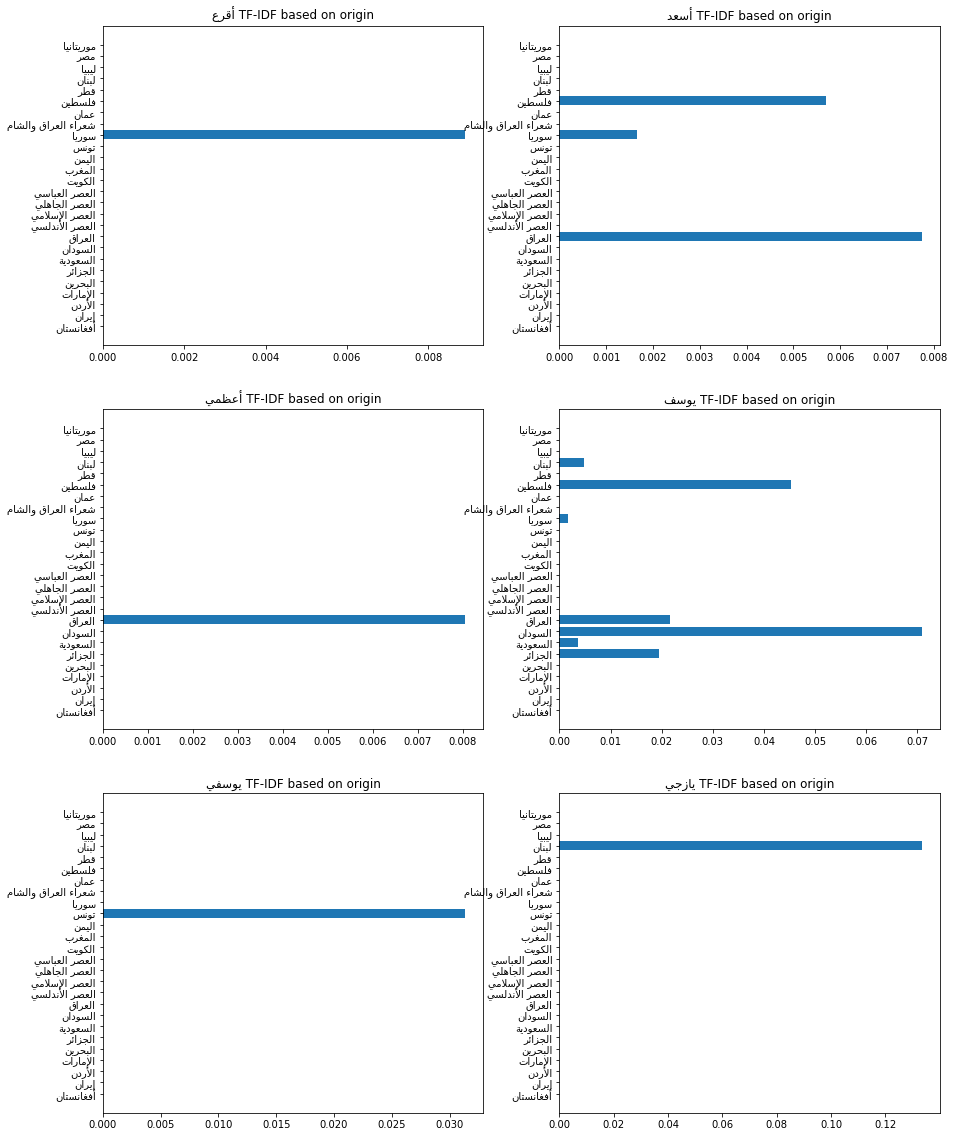

In [23]:
def check_word_presence(TFIDF_df, word, ax):
  '''
  This function takes the lookup dataframe and a specific name and
  find the TFIDF value of each origin 
  param TFIDF_df: (DataFrame) the lookup dataframe
  param word: (string) name to check its TFIDF per origin
  param ax: (plt axis) used to plot the figure
  '''
  # plot a horizontal bar of the tf-idf values for each origin
  ax.barh(y=[get_display(reshaper.reshape(origin)) for origin in TFIDF_df['poet_cat'].tolist()],
          width= TFIDF_df[word])
  # setting title
  ax.set_title(f"{get_display(reshaper.reshape(word))} TF-IDF based on origin")


# creating main figure
fig = plt.figure(figsize=(15,20))

# looking over names and using the function to create plots
for idx, name in enumerate(['أقرع','أسعد','أعظمي','يوسف','يوسفي','يازجي']):
  ax = fig.add_subplot(3,2,idx+1)
  check_word_presence(TFIDF_df, name, ax)  

From the above plots, it appears that some names such as "يازجي" helps distinguish an origin. However, some others highlight multiple origins.

Overall, i believe that a model with a memory retention ability would benefit from such feature.



# 3. Audit the data for missing or extremes values and deal with it reasonably if any

#### Handling Nulls

In [24]:
print(f'Entries with missing values: {poems.shape[0] - poems.dropna().shape[0]}')

Entries with missing values: 1


In [25]:
# viewing the entries containing empty features
poems[poems.isnull().any(axis=1)]

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
2454,6200,http://www.adab.com/modules.php?name=Sh3er&doWhat=shqas&qid=6200&r=&rc=282,فصحى,NaN,الأشباح,البحرين,68,http://www.adab.com/modules.php?name=Sh3er&doWhat=lsq&shid=68&start=0,قاسم حداد


In [26]:
# sice its only 1 row, will remove it
poems.dropna(inplace=True)

### Dropping Iraq and shaam poems
As explained in the EDA section, there is already a category for Iraq and another for Syria. Hence, the "Iraq and Shaam" category needs to be removed to avoide overlapping.

(A better idea is to group origins with small samples)

In [27]:
poems.drop(index= poems[poems['poet_cat']=='شعراء العراق والشام'].index, inplace=True)
poems.reset_index(drop=True, inplace=True)

### Reduce entries of Abbasi poet origin
Currently, the count of entries with abbasi origin is overwhelming.

In [28]:
# so dataframe doesnt display the whole poem
pd.set_option('display.max_colwidth', 50)

In [29]:
# high will have the number of abbasi count, low will have andalusi count (second highest)
# the plan is to bring down abbasi count to be equal to andalusi
high, low = poems.groupby('poet_cat')['poet_cat'].count().sort_values(ascending=False)[:2].values
print(f'Need to trim {high-low} rows')

Need to trim 13121 rows


In [30]:
# select samples to remove
_, remove = train_test_split(poems[poems['poet_cat'] == 'العصر العباسي'], test_size=high-low)

# drop the selected samples from the main dataframe
poems.drop(index=remove.index.values, inplace=True)

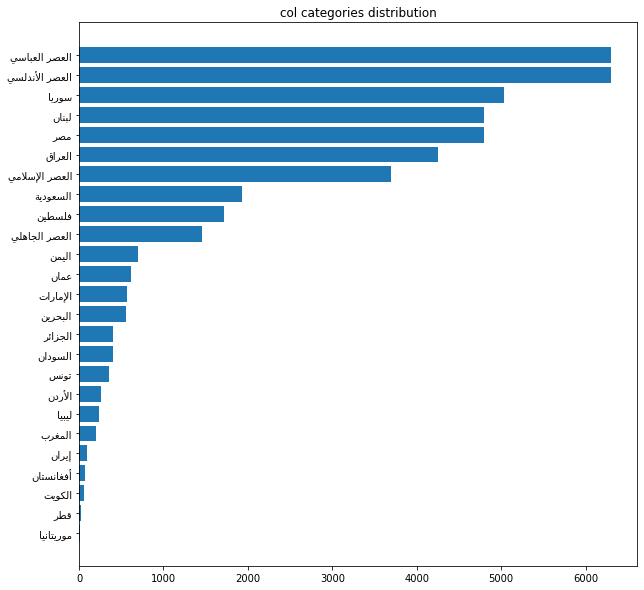

In [31]:
# How the count looks after dropping
show_unique(poems, ['poet_cat'])

# 4. Drive new variables from the current variables that may be useful in the modelling (Optional).


#### Visualizing the word count distribution of poet_name + poem_title

We are going to create a feature which consist of the ID numbers of each suffix/ prefix/ word in the dictionary. Which facilitates the operation of passing these inputs to the model.

However, since the encoded feature's length needs to be standardized, the first step is to find the distribution of the length of these two words to determine the optimal standard size.



In [32]:
# finding the length for names and poem titles
name_lengths = np.array([len(name.split(' ')) for name in poems['poet_name']])
title_lengths = np.array([len(title.split(' ')) for title in poems['poem_title']])

# adding the length of each name with the length of each title
total = name_lengths + title_lengths

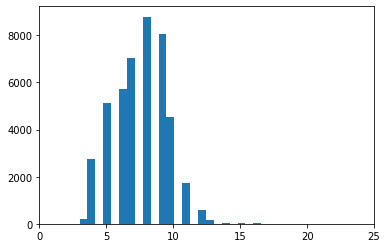

In [33]:
# plotting the distribution
ax = plt.subplot(111)
ax.hist(total,100)

#truncating to 1k to make it clearer

ax.set_xlim((0,25))
plt.show()

Majority of poet name and poem title combination has a word count of 6 to 10 words.

However, when using Farasa segmenter, the suffex and prefix will be attached from words and will be registered as separate words which could tripple the count. Hence, to be safe, we will take a standard size of 30 characters. 

In [34]:
# declaring standard sequence size is 30
STANDARD_LEN = 30

### Encode poet name and poet title into a new feature

Below we encode the two features (poet name and poem title) using AraBERT tokenizer which uses Farasa to segment words before converting them to IDs

I chosed AraBERT due to the following
* has a large dictionary
* ability to encode special characters
  * [SEP] enables us to pass multiple fetures
* Uses Farasa to segment words


In [35]:
def encode(word, word2, maxlen=100):
  '''
  This function takes 2 words and uses Huggingface AraBERT to convert it to IDs
  param word: (string) first feature
  param word2: (string) second feature
  param maxlen: maximum length, which the 2 words will be padded to / truncated to
  output: (list) a list of prefix/suffix/special characters or words in IDs
  '''

  # we are using arabert to tokenize due to its big dictionary
  # and the ability to encode special characters such as [SEP] and [CLS]
  return arabert_tokenizer.encode(
        word,word2,
        truncation=True,
        max_length=maxlen,
        add_special_tokens=True,
        padding='max_length',
        return_attention_mask=False,
        return_token_type_ids=False)

In [36]:
encoded = []

# using the above function to encode poet name and poem title 
for idx, row in poems.iterrows():
  encoded.append(np.array(encode(row['poet_name'], row['poem_title'], maxlen=STANDARD_LEN)))
poems['encodes'] = encoded

# 5. Mention a method for selecting the significant variables (Optional, for NLP task only).




At the end of the EDA section, we showed how the poet name could benefit the model as some origins can be highlighted with a set of names. Hence, poet_name was selected to be one of the significant variable.

Another significant variable is the poem title. as explained earlier, this is due to the meaning which it holds. A title is an overall summary of the poem. furthermore, each origin has a culture which affects the topic of poems, dilects and words used. Therefore, the poem_title was sellected.

# 7. Mention the type of modelling that is suitable for the problem and describe your criteria for the selection (Decision Tree, linear regression or Deep learning, etc.)

We have poet name and poem title encoded into a vector.

A model with memory retention ability could benefit from the poet name to classify origin. Furthermore, word embedding is needed to capture semantic similarity between words which, i think, will improve performance.


Our model will be an Long Short Term Memory(LSTM) model with a word embedding input layer.


### Preparing train and validation and test set

In [39]:
# resetting index (because we dropped entries during cleaning)
poems.reset_index(drop=True, inplace=True)

# stratified split based on label 20% test
train_val_df, test_df = train_test_split(poems[['encodes','poet_cat']].copy(), stratify=poems['poet_cat'].tolist(), test_size=0.2)

# Further splitting trainset to validation (20%)
train_val_df.reset_index(drop=True, inplace=True)
train_df, val_df = train_test_split(train_val_df[['encodes','poet_cat']], stratify=train_val_df['poet_cat'].tolist(), test_size=0.2)
print(f'Train: {train_df.shape[0]}\nValidation: {val_df.shape[0]}\nTest: {test_df.shape[0]}')

Train: 28691
Validation: 7173
Test: 8967


In [40]:
# Resetting index to start from 0
train_df.reset_index(drop=True, inplace=True)
train_df.head(2)

,encodes,poet_cat
0,"[29756, 39512, 23803, 445, 981, 1001, 5, 19068...",الأردن
1,"[29756, 5468, 22635, 20492, 980, 29758, 29759,...",العراق


In [41]:
# Resetting index to start from 0
test_df.reset_index(drop=True, inplace=True)
test_df.head(2)

,encodes,poet_cat
0,"[29756, 5471, 49801, 29758, 4782, 29758, 29757...",سوريا
1,"[29756, 5340, 445, 44540, 12134, 445, 45021, 5...",مصر


In [42]:
# same for validation
val_df.reset_index(drop=True, inplace=True)
val_df.head(2)

,encodes,poet_cat
0,"[29756, 5468, 445, 28444, 27526, 29758, 5907, ...",البحرين
1,"[29756, 5340, 445, 28784, 445, 45803, 7996, 29...",سوريا


Separating X and y features for both Train and Test sets

In [43]:
# Getting the label names of the y feature (origin)
labels = pd.get_dummies(poems['poet_cat']).columns.values

In [44]:
# one hot encode y
train_y = pd.get_dummies(train_df.pop('poet_cat')).to_numpy()
# same process on val
val_y = pd.get_dummies(val_df.pop('poet_cat')).to_numpy()


In [45]:
# X will be a list of encoded features (batch_size, vector_size)
train_X = np.stack(train_df['encodes'].values)
val_X = np.stack(val_df['encodes'].values)


### Calculating clas weight to help with imbalance data

In [46]:
# conting the occurance of each origin
weightage = train_y.sum(axis=0)
weightage

array([  45,   58,  170,  360,  354,  259, 1236,  258, 2721, 4029, 2368,
        935, 4029,   34,  130,  448,  225, 3223,  396, 1096,   14, 3072,
        154, 3067,   10], dtype=uint64)

In [47]:
# favouring origins with low occurances
weightage = (weightage.sum()/weightage)
weightage

array([ 637.57777778,  494.67241379,  168.77058824,   79.69722222,
         81.0480226 ,  110.77606178,   23.21278317,  111.20542636,
         10.54428519,    7.12112187,   12.11613176,   30.6855615 ,
          7.12112187,  843.85294118,  220.7       ,   64.04241071,
        127.51555556,    8.9019547 ,   72.4520202 ,   26.17791971,
       2049.35714286,    9.33951823,  186.30519481,    9.35474405,
       2869.1       ])

In [48]:
# normalizing weights
weightage = weightage/weightage.max()
weightage

array([0.22222222, 0.17241379, 0.05882353, 0.02777778, 0.02824859,
       0.03861004, 0.00809061, 0.03875969, 0.00367512, 0.00248201,
       0.00422297, 0.01069519, 0.00248201, 0.29411765, 0.07692308,
       0.02232143, 0.04444444, 0.0031027 , 0.02525253, 0.00912409,
       0.71428571, 0.00325521, 0.06493506, 0.00326052, 1.        ])

In [49]:
# converting to a dectionary where key is class number 
class_weights = {key: val for key, val in enumerate(weightage)}
class_weights

{0: 0.22222222222222224,
 1: 0.1724137931034483,
 2: 0.05882352941176471,
 3: 0.02777777777777778,
 4: 0.028248587570621472,
 5: 0.038610038610038616,
 6: 0.008090614886731393,
 7: 0.03875968992248062,
 8: 0.003675119441381845,
 9: 0.002482005460412013,
 10: 0.004222972972972973,
 11: 0.010695187165775402,
 12: 0.002482005460412013,
 13: 0.29411764705882354,
 14: 0.07692307692307693,
 15: 0.02232142857142857,
 16: 0.044444444444444446,
 17: 0.003102699348433137,
 18: 0.025252525252525256,
 19: 0.009124087591240877,
 20: 0.7142857142857142,
 21: 0.003255208333333333,
 22: 0.06493506493506494,
 23: 0.0032605151613955006,
 24: 1.0}

### Model construction and Training

In [50]:
# creating a sequential model
model = tf.keras.Sequential()

# first layer is the embedding layer
# 63999 is the number of words in AraBert dictionary
model.add(tf.keras.layers.Embedding(63999, 64, input_length=STANDARD_LEN))

# Followed by 2 lstm layers
model.add(tf.keras.layers.LSTM(64, dropout=0.3, return_sequences=True))

model.add(tf.keras.layers.LSTM(32, return_sequences=False))

#  Dense layer with softmax for categorical output
model.add(tf.keras.layers.Dense(len(train_y[0]), activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4)

model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics='categorical_accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 64)            4095936   
_________________________________________________________________
lstm (LSTM)                  (None, 30, 64)            33024     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 25)                825       
Total params: 4,142,201
Trainable params: 4,142,201
Non-trainable params: 0
_________________________________________________________________


In [51]:
# using a model checkpoint to save the model with the lowest validation loss
cb = tf.keras.callbacks.ModelCheckpoint(
    filepath="origin_classifier_lstm.h5",
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

# Training model using the train and validation sets
# also using class weights to compensate minority classes
history = model.fit(x=train_X, y=train_y, validation_data=(val_X, val_y),
          epochs=20, batch_size= 128, class_weight=class_weights,
          callbacks=[cb])

Epoch 1/20
225/225 [==============================] - 26s 117ms/step - loss: 0.0276 - categorical_accuracy: 0.0340 - val_loss: 2.7636 - val_categorical_accuracy: 0.0330
Epoch 2/20
225/225 [==============================] - 25s 111ms/step - loss: 0.0245 - categorical_accuracy: 0.0640 - val_loss: 2.5185 - val_categorical_accuracy: 0.0829
Epoch 3/20
225/225 [==============================] - 25s 109ms/step - loss: 0.0238 - categorical_accuracy: 0.1173 - val_loss: 2.5302 - val_categorical_accuracy: 0.0024
Epoch 4/20
225/225 [==============================] - 25s 112ms/step - loss: 0.0236 - categorical_accuracy: 0.0801 - val_loss: 2.5142 - val_categorical_accuracy: 0.0909
Epoch 5/20
225/225 [==============================] - 25s 113ms/step - loss: 0.0232 - categorical_accuracy: 0.0981 - val_loss: 2.4628 - val_categorical_accuracy: 0.0841
Epoch 6/20
225/225 [==============================] - 26s 117ms/step - loss: 0.0228 - categorical_accuracy: 0.2046 - val_loss: 2.3501 - val_categorical_acc

Note: The model converges much slower than when trained without applying class werights. I believe this is due to the minority class being recognized now compared to before applying weights (model used to be biased towards the large groups and treat minorities as noise)

# 8. Interpret the result of the modelling technique.


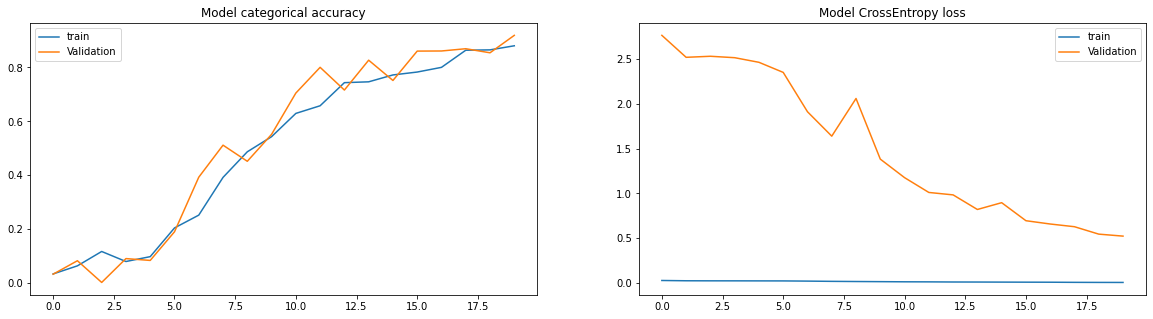

In [58]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,2,1)
ax.plot(history.history['categorical_accuracy'], label='train')
ax.plot(history.history['val_categorical_accuracy'], label='Validation')
ax.legend()
ax.set_title("Model categorical accuracy")

ax1 = fig.add_subplot(1,2,2)
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='Validation')
ax1.legend()
ax1.set_title("Model CrossEntropy loss")
plt.show()

From the accuracy plot above, the model seems to be learning gradually overall but there are fluctuations (zigzag line). this indicates that the learning rate might be too high and the model is facing dificulty doing gradient descent as the magnitude of change is high. This could be solved using a decaying learning rate which reduces over time.

Overall, validation accuracy has reached 90% at epoch 20 and it looks like we can obtain better performance if we trained for more than 20 epochs



From the loss plot above, it also looks like the model is improving gradually as the loss are gradually reducing the more we progress. however, the training loss is concerning as it starts very low (0.0276 at first epoch) and gradualy reduces which is expected but i could not find an explaination to explain why it starts this low.

# 9. Report the TypeI and TypeII errors of the developed model (Optional).


Lets report Type1 and Type2 errors for the validation set

In [53]:
# predicting validation X
val_predict = model.predict(val_X)

In [54]:
# making a dataframe which contains the label and predicted label
val_result = pd.DataFrame({
    'label' : [labels[np.argmax(array)] for array in val_y],
    'pred' : [labels[np.argmax(array)] for array in val_predict]
})
val_result.head(3)

,label,pred
0,البحرين,البحرين
1,سوريا,سوريا
2,العصر العباسي,العصر العباسي


In [55]:
lblst = labels.tolist()
lblst.index('أفغانستان')

0

In [56]:
# there arrays to hold the error types and classes
n_classes = val_result['label'].nunique()
type1, type2, class_ = np.zeros((n_classes),dtype='uint8'), np.zeros((n_classes),dtype='uint8'), np.array(['***************' for _ in range(n_classes)])


# group by class and calculate percentage Type 1 error (False negative)
for g_name, df in val_result.groupby('label'):
    type1[lblst.index(g_name)] = (df[df['pred'] != df['label']].shape[0] /df.shape[0])*100
    class_[lblst.index(g_name)] = g_name

# group by prediction and calculate percentage Type 2 error (False positive)
for g_name, df in val_result.groupby('pred'):
    type2[lblst.index(g_name)] = (df[df['pred'] != df['label']].shape[0] / df.shape[0])*100

# constructing a dataframe for easy plotting
error_results = pd.DataFrame({'typeI' : type1.tolist(),
                       'typeII' : type2.tolist(),
                       'class': class_.tolist()})

Text(0.5, 1.0, 'Type II error')

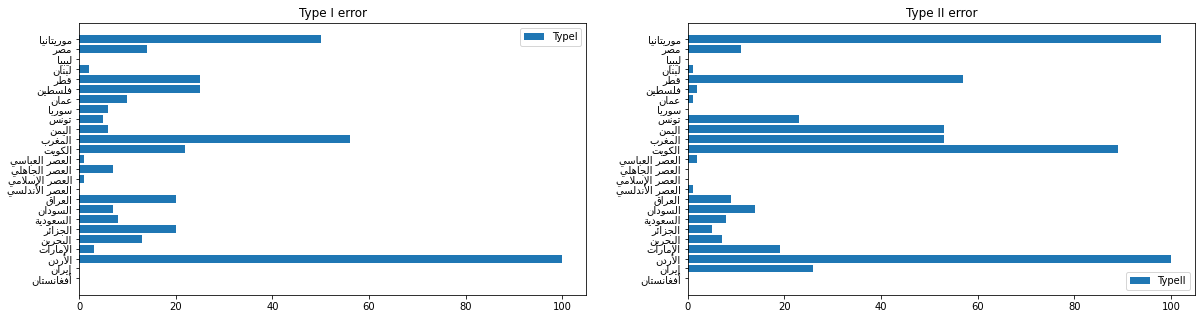

In [57]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,2,1)
ax.barh([get_display(reshaper.reshape(cat)) for cat in error_results['class']], error_results['typeI'], label='TypeI')
ax.legend()
ax.set_title("Type I error")

ax1 = fig.add_subplot(1,2,2)
ax1.barh([get_display(reshaper.reshape(cat)) for cat in error_results['class']],error_results['typeII'], label='TypeII')
ax1.legend()
ax1.set_title("Type II error")


From Type1 error above, we notice that the model was not able to learn Jordanian poems at all as it misclassified 100% of jordanian poems. the model also has difficulty classifying Mauritanian and Morrocan poems.

From Type2 error above, we also see that the model has completely faild to recognize Jordanian poems as the false positive is also 100%. Furthermore, the model highly struggles with mauritanian and kuwaiti poems at it keeps classifying other origins' poes as mauritanian and kuwaiti.

Overall, we notice that the minority group still suffer from the imbalance even after applying class weighting technique during training.

# 10. Report the model results and suggest recommendations.


Lets use the test set we preserved to calculate the accuracy

In [79]:
# performing prediction on X feature in test dataframe
test_pred = model.predict(np.stack(test_df['encodes'].values))

# getting the true labels from the test set
test_y = pd.get_dummies(test_df['poet_cat']).to_numpy()

In [80]:
m = tf.keras.metrics.CategoricalAccuracy()
m.update_state(test_y, test_pred)
m.result().numpy()

0.9141296

As can be seen from above, the accuracy is 91.41%

Below i will add the predicted label next to the true label in the test dataframe

In [81]:
# adding the predicted values next to the labels
test_df['pred'] = test_pred.tolist()

# convert softmax to label
test_df['pred'] = test_df['pred'].apply(lambda pred: labels[np.argmax(pred)])


In [82]:
# How it looks like
test_df.head(5)

,encodes,poet_cat,pred
0,"[29756, 5471, 49801, 29758, 4782, 29758, 29757...",سوريا,السعودية
1,"[29756, 5340, 445, 44540, 12134, 445, 45021, 5...",مصر,مصر
2,"[29756, 5233, 980, 459, 445, 28677, 29758, 857...",العصر الجاهلي,العصر الجاهلي
3,"[29756, 12219, 20479, 445, 7928, 1003, 29758, ...",العراق,العراق
4,"[29756, 445, 44483, 445, 1003, 29237, 1007, 29...",العصر الإسلامي,العصر الإسلامي


#### Suggestions anf future work

* Apply decaying learning rate
* Run experiments to optimize the layers of the model
* preprocess and use the poem text feature (take keywords) 
* Upsample minority class using pre-trained word embedding to generate similar sentences